# Import all the required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Z Score
from scipy import stats
# Robust Scaler
from sklearn.preprocessing import RobustScaler

In [2]:
df = pd.read_csv('StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99.0,95.0
996,male,group C,high school,free/reduced,none,62,55.0,55.0
997,female,group C,high school,free/reduced,completed,59,71.0,65.0
998,female,group D,some college,standard,completed,68,78.0,77.0


# Fill the missing values

In [3]:
df.ffill()
df.bfill()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99.0,95.0
996,male,group C,high school,free/reduced,none,62,55.0,55.0
997,female,group C,high school,free/reduced,completed,59,71.0,65.0
998,female,group D,some college,standard,completed,68,78.0,77.0


# Drop null values

In [4]:
df = df.dropna()
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# Drop invalid values and convert categorical into numerical datatype

In [5]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                      object
reading score                  float64
writing score                  float64
dtype: object

In [6]:
df['math score'] = df['math score'].replace('?', np.nan)
df['math score'] = df['math score'].astype(float)
df['math score'].fillna(df['math score'].mean(), inplace=True)

/tmp/ipykernel_4200/2829630817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['math score'] = df['math score'].replace('?', np.nan)
/tmp/ipykernel_4200/2829630817.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['math score'] = df['math score'].astype(float)
/tmp/ipykernel_4200/2829630817.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

# Histogram.

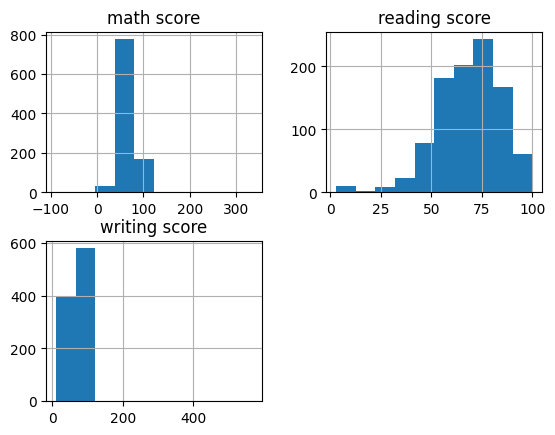

In [7]:
df.hist()
plt.show()

# Visualize Outliers

<Axes: >

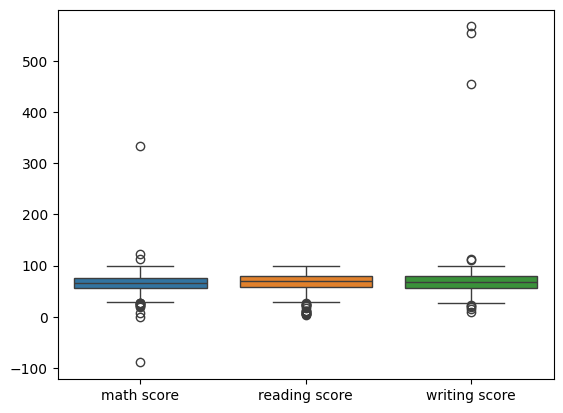

In [8]:
sns.boxplot(df)

<Axes: ylabel='math score'>

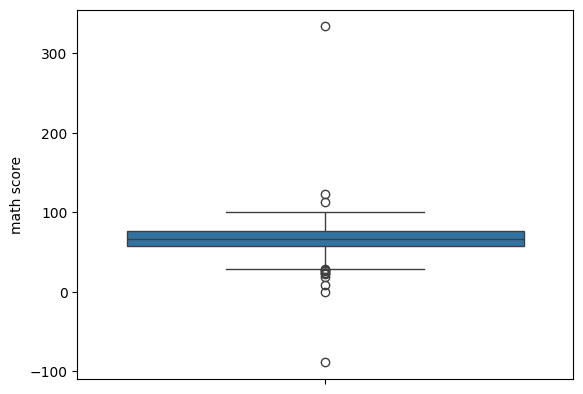

In [9]:
sns.boxplot(df['math score'])

# Outlier Detection -> Z-score

In [10]:
z1 = np.abs(stats.zscore(df['math score']))
z2 = np.abs(stats.zscore(df['writing score']))
z3 = np.abs(stats.zscore(df['reading score']))

arr = np.where(z1 > 3)
print('math score : ',arr)

arr = np.where(z2 > 3)
print('writing score : ',arr)

arr = np.where(z3 > 3)
print('reading score : ',arr)

math score :  (array([ 49, 421, 446, 464, 958]),)
writing score :  (array([532, 581, 641]),)
reading score :  (array([17, 18, 19, 20, 21, 22, 23, 26, 27, 28, 49]),)


In [11]:
df.shape

(978, 8)

# Outlier Detection -> IQR

### Math Score

In [12]:
Q1 = df['math score'].quantile(0.25)
Q3 = df['math score'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

df = df[(df['math score'] > lower) & (df['math score'] < upper)]
df.shape

(964, 8)

### Writing score

In [13]:
Q1 = df['writing score'].quantile(0.25)
Q3 = df['writing score'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

df = df[(df['writing score'] > lower) & (df['writing score'] < upper)]
df.shape

(957, 8)

### Reading Score

In [14]:
Q1 = df['reading score'].quantile(0.25)
Q3 = df['reading score'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

df = df[(df['reading score'] > lower) & (df['reading score'] < upper)]
df.shape

(943, 8)

<Axes: ylabel='math score'>

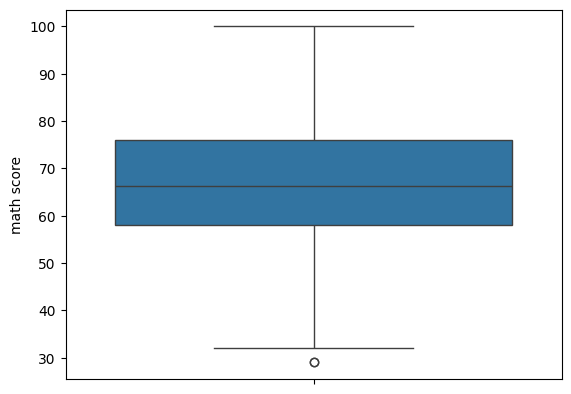

In [15]:
sns.boxplot(df['math score'])

<Axes: ylabel='writing score'>

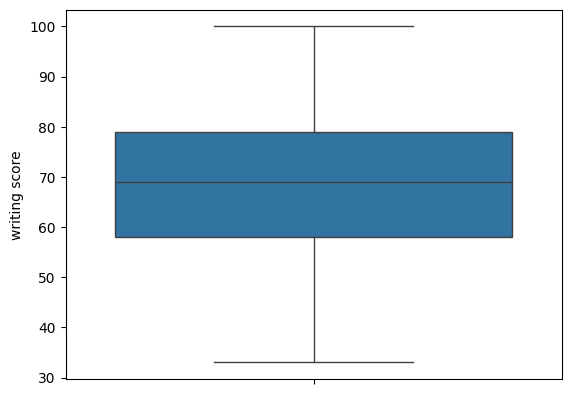

In [16]:
sns.boxplot(df['writing score'])

<Axes: ylabel='reading score'>

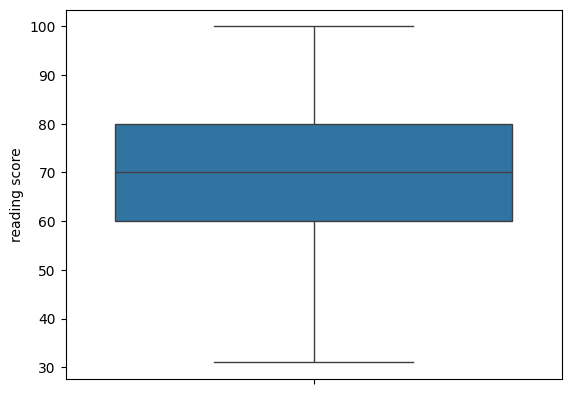

In [17]:
sns.boxplot(df['reading score'])

# KDE Graph

/tmp/ipykernel_4200/1908935278.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['math score'], shade=True, color='r', label='Math Score', ax=axs[0])
/tmp/ipykernel_4200/1908935278.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['reading score'], shade=True, color='g', label='Reading Score', ax=axs[1])
/tmp/ipykernel_4200/1908935278.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['writing score'], shade=True, color='b', label='Writing Score', ax=axs[2])


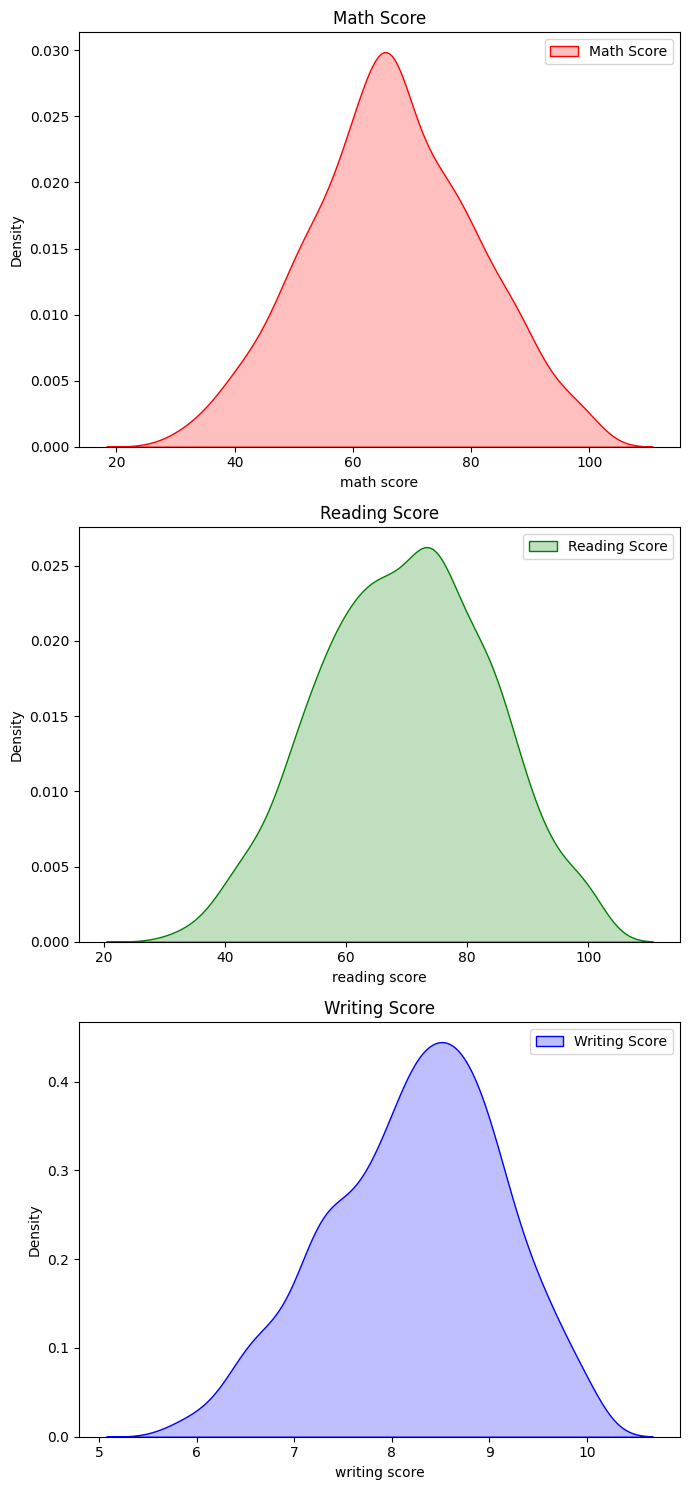

In [28]:
fig, axs = plt.subplots(3, 1, figsize=(7, 15))

sns.kdeplot(df['math score'], shade=True, color='r', label='Math Score', ax=axs[0])
axs[0].set_title('Math Score')
axs[0].legend()

sns.kdeplot(df['reading score'], shade=True, color='g', label='Reading Score', ax=axs[1])
axs[1].set_title('Reading Score')
axs[1].legend()

sns.kdeplot(df['writing score'], shade=True, color='b', label='Writing Score', ax=axs[2])
axs[2].set_title('Writing Score')
axs[2].legend()

plt.tight_layout()
plt.show()

In [19]:
# Robust Scaling
numeric_data = df.select_dtypes(include=['float64', 'int64'])
scaler = RobustScaler()
scaled_data = scaler.fit_transform(numeric_data)


# Data Transformation

### Applying square root transformation 

0.015273220319731322

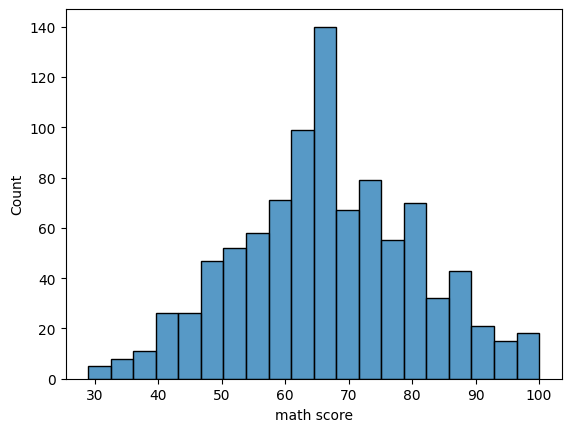

In [31]:
df['math score'] = np.sqrt(df['math score'])
sns.histplot(df['math score']) 
df['math score'].skew()

-0.3022249151709559

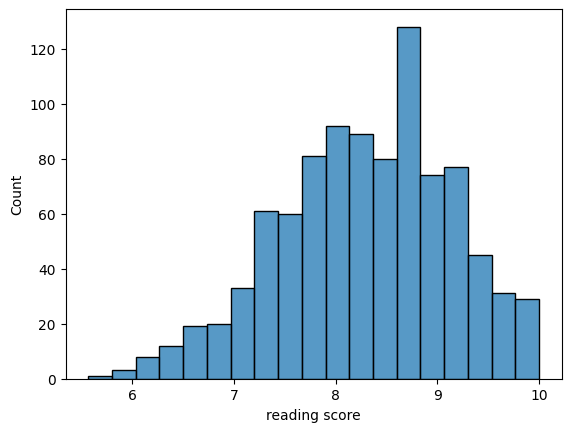

In [38]:
df['reading score'] = np.sqrt(df['reading score'])
sns.histplot(df['reading score'])
df['reading score'].skew()

-0.43183042512963254

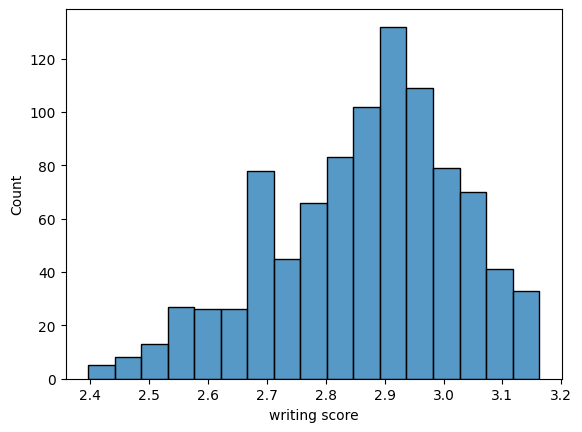

In [37]:
df['writing score'] = np.sqrt(df['writing score'])
sns.histplot(df['writing score'])
df['writing score'].skew() 